<span style="color:grey"> By Seongchan Kang </span>

<span style="color:grey"> Version : Python 3.10.1 in Window </span>

# 모델링(Modeling) 기법 선택

현재 올리지는 못했지만 올리고 싶었던 선택 알고리즘을 통해 모델링할 기법을 고름.

- 데이터가 글이나 시계열은 아님
- 범주를 예측함
- 데이터가 식별값을 가짐
- 그렇다면 분류에 해당함(로지스틱 회귀, 선형, 최근접, svm, 딥러닝, 의사결정 나무 등...)
- 2번째로는 의사결정 나무(Decsion Tree)를 실습하고자 함
- 로지스틱 회귀의 경우 이중분류라고 한다면, 의사결정 나무는 다중 분류라고 볼 수 있음. 두 가지의 결과를 비교하고자 함.

# KNN(최근접 이웃 회귀)란

KNN은 분류를 하기 위해 사용하는 알고리즘임

근접해있는 샘플들의 거리를 계산하여 분류하는 기법

KNN에서 K 는 "k개의 데이터와 비교하여 분류"를 뜻함

k개를 선택하기때문에 이또한 결정트리처럼 과대적합이나 과소적합이 일어날 수 있음

최근접 이웃 회귀도 지도학습으로 예측을 하는 기법

참고 출처 1 : <span> https://smecsm.tistory.com/53 </span>

참고 출처 2 : <span> https://wooono.tistory.com/88 </span>

# KNN(최근접 이웃 회귀) 실습

## 라이브러리 및 파일 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [20]:
# 파일 불러오기
data = pd.read_csv("titanic_df.csv")
data = data.drop(labels = "Unnamed: 0", axis = 1)
data

,Sex,Embarked,ToH,Survived,Pclass,Age,Fare,Family
0,0,0,2,0,3,22,7.2500,0
1,1,1,3,1,1,38,71.2833,0
2,1,0,1,1,3,26,7.9250,0
3,1,0,3,1,1,35,53.1000,0
4,0,0,2,0,3,35,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,0,4,0,2,27,13.0000,0
887,1,0,1,1,1,19,30.0000,0
888,1,0,1,0,3,21,23.4500,1
889,0,1,2,1,1,26,30.0000,0


## 표준화

KNN에서는 정규화가 중요

모든 데이터 포인트가 동일한 정도의 스케일(중요도)로 반영되도록 해주는 게 정규화(Normalization)의 목표

정규화 없이 실행하면 결과의 차이가 나는 것을 알 수 있음

여기서 2 가지 정규화 방법 사용
1. Min-Max Normalization (최소-최대 정규화)
2. Z-Score Normalization (Z-점수 정규화)

아래 시각적으로 확인한 결과
- Age의 경우는 이상치가 민감하게 작용하지 않을거라고 판단 => 최소-최대 정규화
- Fare의 경우는 이상치가 민감하게 작용할거라 판단 => Z정규화

<span> https://hleecaster.com/ml-normalization-concept/ </span>

In [10]:
data.describe()

,Sex,Embarked,ToH,Survived,Pclass,Age,Fare,Family
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.352413,0.365881,2.115600,0.383838,2.308642,29.687991,32.204208,0.329966
std,0.477990,0.640157,0.967502,0.486592,0.836071,13.218614,49.693429,0.763633
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,0.000000,2.000000,21.000000,7.910400,0.000000
50%,0.000000,0.000000,2.000000,0.000000,3.000000,30.000000,14.454200,0.000000
75%,1.000000,1.000000,2.000000,1.000000,3.000000,35.000000,31.000000,0.000000
max,1.000000,2.000000,5.000000,1.000000,3.000000,80.000000,512.329200,5.000000


<AxesSubplot:>

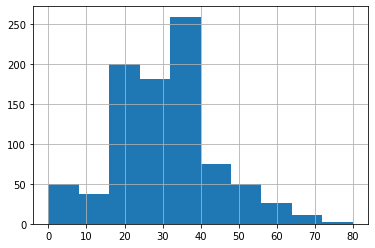

In [15]:
data["Age"].hist()

<AxesSubplot:>

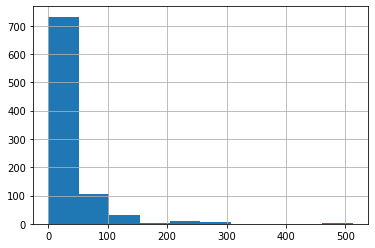

In [13]:
data["Fare"].hist()

### 최소-최대 정규화

In [17]:
# 함수 선언 #
def min_max_normalize(lst):
    normalized = []
    
    for value in lst:
        normalized_num = (value - min(lst)) / (max(lst) - min(lst))
        normalized.append(normalized_num)
    
    return normalized

In [21]:
data["Age"] = min_max_normalize(data["Age"])
data.describe()

,Sex,Embarked,ToH,Survived,Pclass,Age,Fare,Family
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.352413,0.365881,2.115600,0.383838,2.308642,0.371100,32.204208,0.329966
std,0.477990,0.640157,0.967502,0.486592,0.836071,0.165233,49.693429,0.763633
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,0.000000,2.000000,0.262500,7.910400,0.000000
50%,0.000000,0.000000,2.000000,0.000000,3.000000,0.375000,14.454200,0.000000
75%,1.000000,1.000000,2.000000,1.000000,3.000000,0.437500,31.000000,0.000000
max,1.000000,2.000000,5.000000,1.000000,3.000000,1.000000,512.329200,5.000000


<AxesSubplot:>

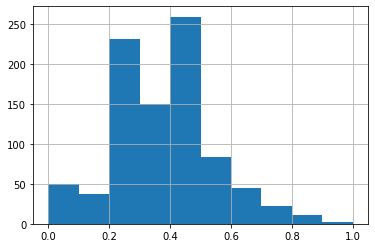

In [22]:
data["Age"].hist()

## Z 정규화

In [23]:
def z_score_normalize(lst):
    normalized = []
    for value in lst:
        normalized_num = (value - np.mean(lst)) / np.std(lst)
        normalized.append(normalized_num)
    return normalized

In [24]:
data["Fare"] = z_score_normalize(data["Fare"])
data.describe()

,Sex,Embarked,ToH,Survived,Pclass,Age,Fare,Family
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,8.910000e+02,891.000000
mean,0.352413,0.365881,2.115600,0.383838,2.308642,0.371100,3.987333e-18,0.329966
std,0.477990,0.640157,0.967502,0.486592,0.836071,0.165233,1.000562e+00,0.763633
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.484217e-01,0.000000
25%,0.000000,0.000000,2.000000,0.000000,2.000000,0.262500,-4.891482e-01,0.000000
50%,0.000000,0.000000,2.000000,0.000000,3.000000,0.375000,-3.573909e-01,0.000000
75%,1.000000,1.000000,2.000000,1.000000,3.000000,0.437500,-2.424635e-02,0.000000
max,1.000000,2.000000,5.000000,1.000000,3.000000,1.000000,9.667167e+00,5.000000


<AxesSubplot:>

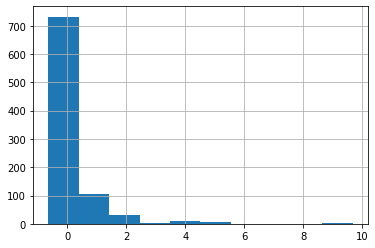

In [25]:
data["Fare"].hist()

## 모델링 및 학습

파라미터 설명
- n_neighbors
  > - 이게 K개를 뜻함.


- weights
  > - 'distance'로 설정하면, 분류할 때 인접한 샘플의 거리에 따라 다른 가중치 부여 (가까울수록 큰 가중치)
  > - 디폴트 값 : 'uniform'


- metric
  > - 거리계산의 척도 (minkowski, euclidean, mahalanobis 등)
  > - 디폴트 값 : 'minkowski'

In [26]:
# X, Y로 변수를 나누기(독립괴 종속 변수)
X = data[['Sex', 'Embarked', 'ToH', 'Pclass', 'Age', 'Fare', 'Family']]
Y = data['Survived']

# 훈련과 테스트로 변수 다시 한번더 나누기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [27]:
# 모델 설정
knn_model = KNeighborsClassifier(n_neighbors = 3)

# 접합( = 학습)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

## 테스트 및 평가

In [28]:
# 평가
print("Train Set Score1 : {}".format(knn_model.score(X_train, Y_train)))
print("Test  Set Score1 : {}".format(knn_model.score(X_test, Y_test)))

Train Set Score1 : 0.8764044943820225
Test  Set Score1 : 0.7611940298507462


## 그리드 서치를 통한 실습

In [31]:
# 돌려볼 매개변수 미리 선언
params = {
  "n_neighbors" : [4, 5, 6, 8, 10],
  "weights" : ['uniform', "distance"],
  "metric" : ["euclidean", "minkowski", "euclidean", "mahalanobis"]
  }

# 그리드 서치로 모델링
grid_cv = GridSearchCV(knn_model, param_grid = params, scoring = "accuracy", cv = 5, return_train_score = True)

# 적합(=학습)
grid_cv.fit(X_train, Y_train)

c:\Users\82108\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\82108\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\82108\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py", line 200, in fit
    return self._fit(X, y)
  File "c:\Users\82108\AppData\Local\Programs\Python\Python310\lib\site-packages\skle

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'metric': ['euclidean', 'minkowski', 'euclidean',
                                    'mahalanobis'],
                         'n_neighbors': [4, 5, 6, 8, 10],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy')

In [38]:
# 데이터 프레임으로 받음
grid_result_df = pd.DataFrame(grid_cv.cv_results_)

# 필요한 칼럼만 가져와서 보기
grid_result_df[["params", "mean_fit_time", "mean_train_score", "mean_test_score", "rank_test_score"]]

## 그나마 인데스 번호 18, 28일때 가장 좋음 

,params,mean_fit_time,mean_train_score,mean_test_score,rank_test_score
0,"{'metric': 'euclidean', 'n_neighbors': 4, 'wei...",0.005594,0.869988,0.817097,10
1,"{'metric': 'euclidean', 'n_neighbors': 4, 'wei...",0.004399,0.986761,0.799471,28
2,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei...",0.004403,0.870394,0.815510,13
3,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei...",0.005593,0.987964,0.815510,13
4,"{'metric': 'euclidean', 'n_neighbors': 6, 'wei...",0.004399,0.867179,0.820284,4
5,"{'metric': 'euclidean', 'n_neighbors': 6, 'wei...",0.004198,0.987964,0.809097,22
6,"{'metric': 'euclidean', 'n_neighbors': 8, 'wei...",0.003995,0.855140,0.813884,19
7,"{'metric': 'euclidean', 'n_neighbors': 8, 'wei...",0.004597,0.987964,0.807484,25
8,"{'metric': 'euclidean', 'n_neighbors': 10, 'we...",0.004594,0.847918,0.823510,1
9,"{'metric': 'euclidean', 'n_neighbors': 10, 'we...",0.004598,0.987964,0.817097,7
